<a href="https://colab.research.google.com/github/Danishilyas372/iris_classification_model/blob/main/iris3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-Score: 0.9722222222222222
Confusion Matrix:
[[40  3]
 [ 1 70]]


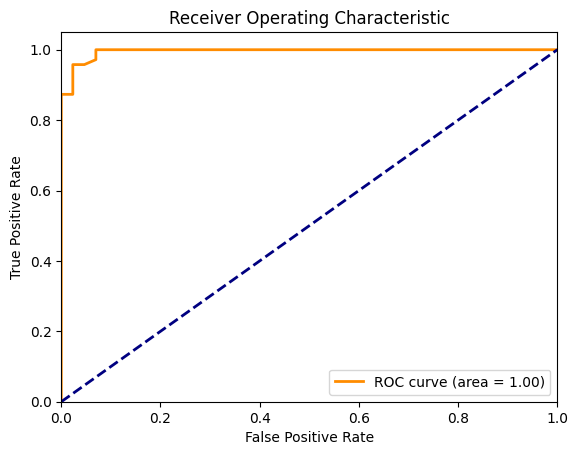

AUC: 0.9952505732066819
Mean Cross-Validation Accuracy: 0.9560937742586555
Standard Deviation of Cross-Validation Accuracy: 0.02283883380490945


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {auc}")
# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score}")
